In [22]:
import pandas as pd
import spacy
from spacy import displacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [23]:
# Knowledge Graph 

In [24]:
doc = nlp("Le thème du projet est COVID 19")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Le ... nmod
thème ... nmod
du ... nmod
projet ... pobj
est ... nmod
COVID ... ROOT
19 ... nummod


In [25]:
def get_entities(sent):
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""   
  prv_tok_text = ""   

  prefix = ""
  modifier = ""
  
  for tok in nlp(sent):

    if tok.dep_ != "punct":

      if tok.dep_ == "compound":
        prefix = tok.text

        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text

        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text

  return [ent1.strip(), ent2.strip()]

In [26]:
f = open(r'C:\Users\LENOVO\Desktop\cours\S5\Ingénierie cognitive\Projet\dataset_text.txt', 'r',encoding="utf8")
txt = f.read()

In [27]:
get_entities(txt)

['public  which', 'educational  interventions']

In [32]:
entity_pairs = []

for i in tqdm(txt):
  entity_pairs.append(get_entities(i))

100%|██████████| 35392/35392 [05:22<00:00, 109.83it/s]


In [34]:
entity_pairs

[['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],

In [35]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [37]:
get_relation(f)

TypeError: object of type '_io.TextIOWrapper' has no len()

In [ ]:
relations = [get_relation(i) for i in tqdm(f)]

100%|██████████| 54/54 [00:00<00:00, 138.37it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

    54
dtype: int64

In [ ]:
source = [i[0] for i in entity_pairs]

target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

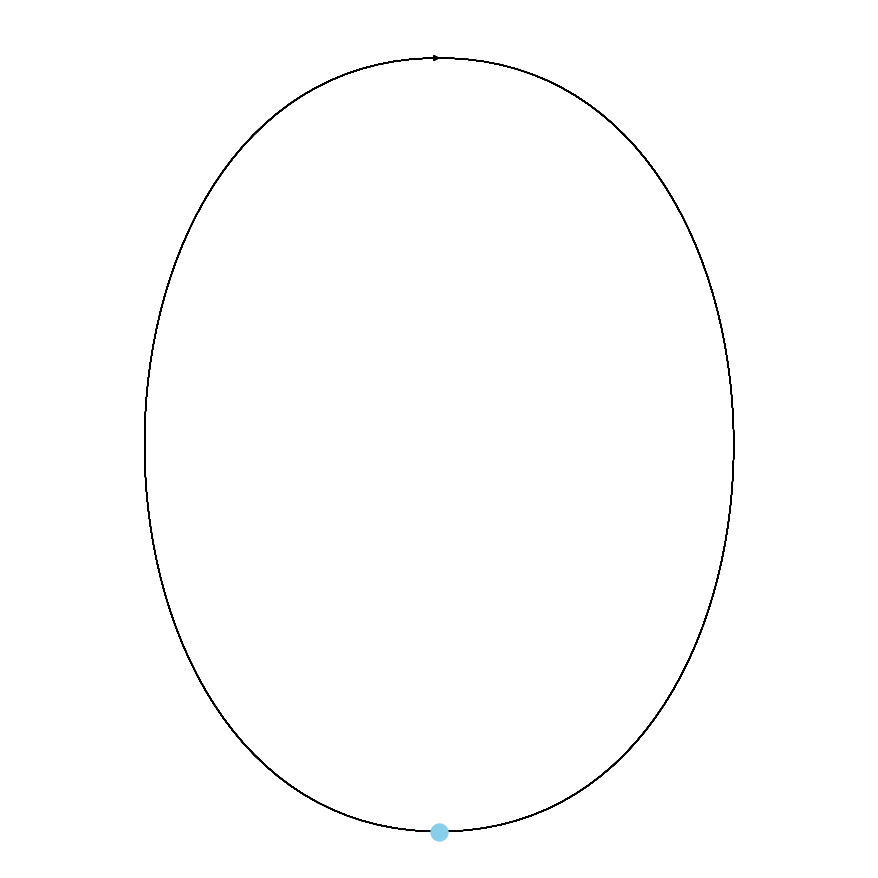

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

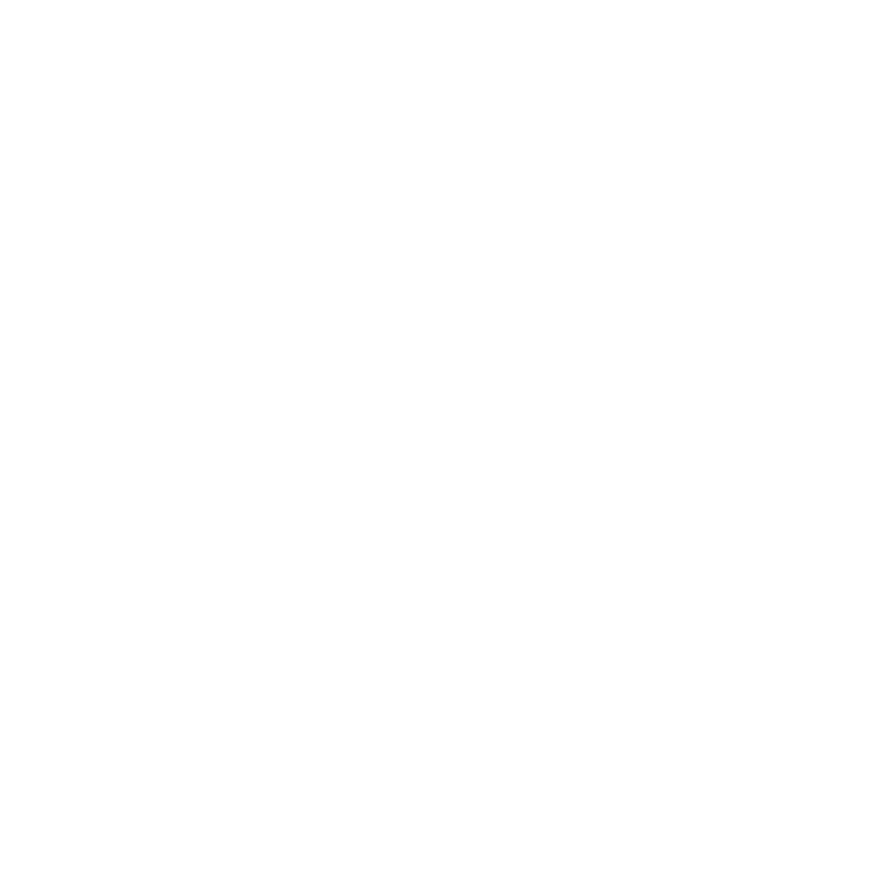

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

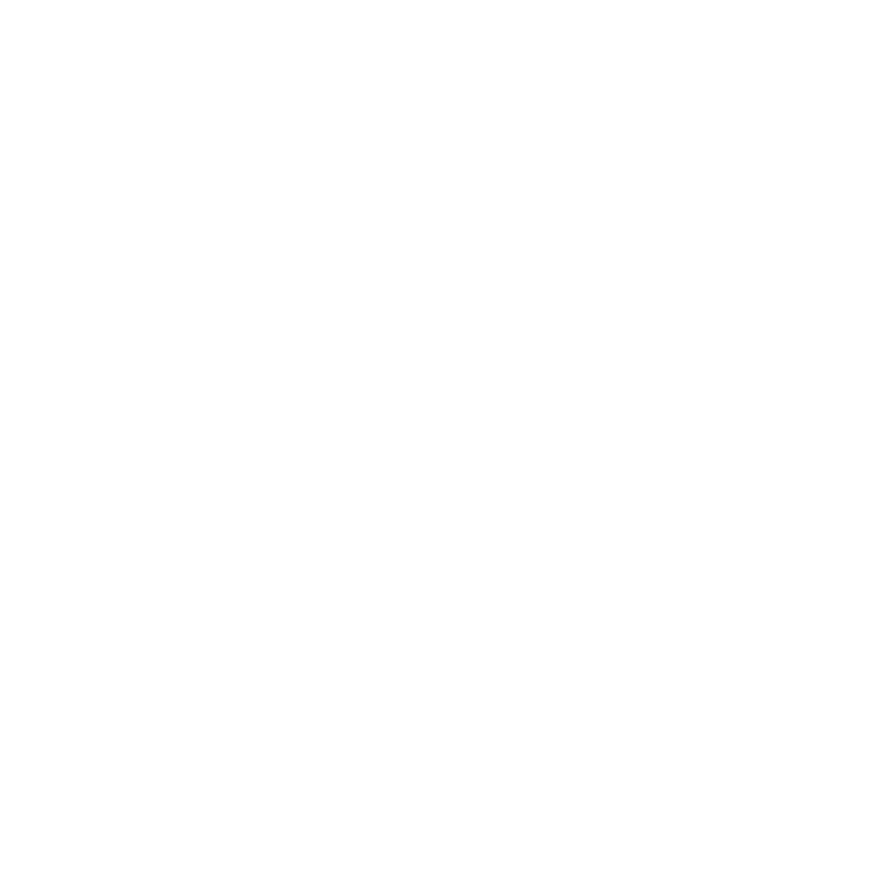

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

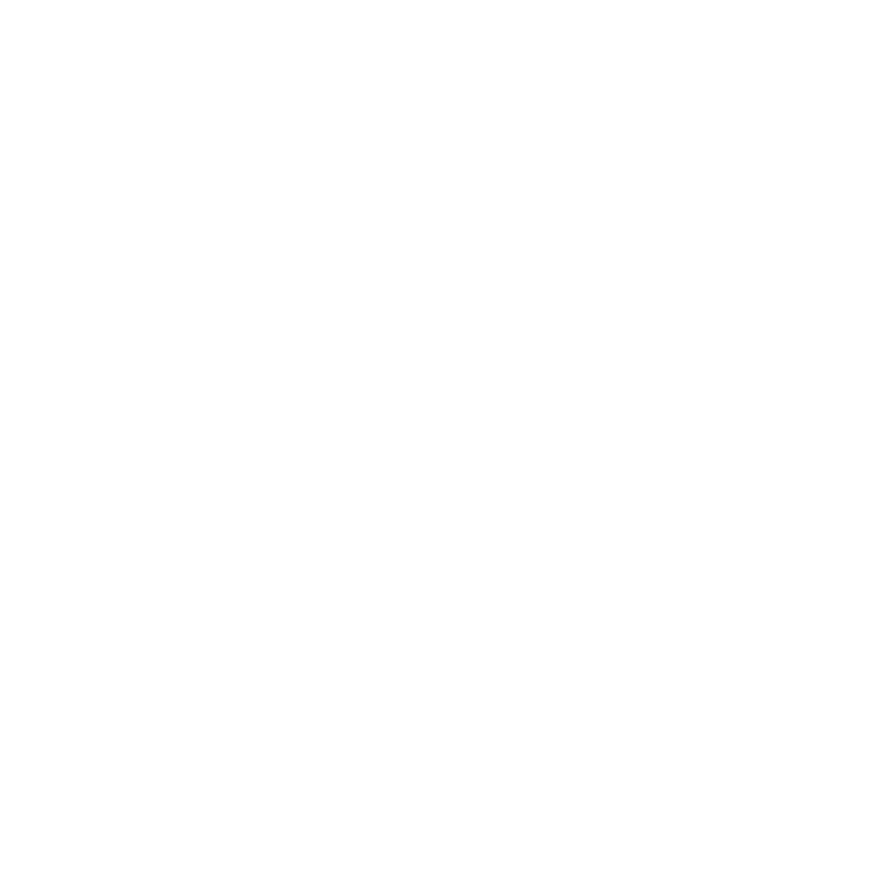

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
# NLTK

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
example_text = df

In [ ]:
word_tokenize(example_text)

['Apple',
 'is',
 'looking',
 'at',
 'buying',
 'U.K.',
 'startup',
 'for',
 '$',
 '1',
 'billion']

In [ ]:
sent_tokenize(example_text)

['Apple is looking at buying U.K. startup for $1 billion']

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
example_text = df
words = word_tokenize(example_text)
filtered_sentence = []
for w in words:
    if w not in stop_words:
        filtered_sentence.append(w)
print(filtered_sentence)

['Apple', 'looking', 'buying', 'U.K.', 'startup', '$', '1', 'billion']


In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
txt = df
sentences = sent_tokenize(txt)
stemmer = PorterStemmer()
new_sentence = []
for i in range(len(sentences)):
    words = word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words]
    new_sentence.append(' '.join(words))
print(new_sentence)

['appl is look at buy u.k. startup for $ 1 billion']


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
txt = df
sentences = sent_tokenize(txt)
lemmtizer = WordNetLemmatizer()
new__lemmatize_sentence = []
for i in range(len(sentences)):
    words = word_tokenize(sentences[i])
    words = [lemmtizer.lemmatize(word) for word in words]
    new__lemmatize_sentence.append(' '.join(words))
print(new__lemmatize_sentence)

['Apple is looking at buying U.K. startup for $ 1 billion']


In [ ]:
from nltk.tokenize import PunktSentenceTokenizer

In [ ]:
train_txt=df
sample_text = df

cust_tokenizer = PunktSentenceTokenizer(train_txt)


tokenized = cust_tokenizer.tokenize(sample_text)
print("Chunked Output")
def process_text():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk:{<NNS.?>*<JJ>+}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            print(chunked)

    except Exception as e:
        print(str(e))

process_text()

Chunked Output
(S
  Apple/NNP
  is/VBZ
  looking/VBG
  at/IN
  buying/VBG
  U.K./NNP
  startup/NN
  for/IN
  $/$
  1/CD
  billion/CD)


In [ ]:
from nltk.tokenize import PunktSentenceTokenizer

In [ ]:
train_txt=df
sample_text = df

cust_tokenizer = PunktSentenceTokenizer(train_txt)


tokenized = cust_tokenizer.tokenize(sample_text)

print("Chinked Output")
def process_text():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            #chunked.draw()
            print(chunked)

    except Exception as e:
        print(str(e))

process_text()

Chinked Output
(S
  (Chunk Apple/NNP)
  is/VBZ
  looking/VBG
  at/IN
  buying/VBG
  (Chunk U.K./NNP startup/NN)
  for/IN
  (Chunk $/$ 1/CD billion/CD))


In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
train_txt=df
sample_text = df

cust_tokenizer = PunktSentenceTokenizer(train_txt)


tokenized = cust_tokenizer.tokenize(sample_text)

print("Named Entity Output")
def process_text():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged,binary = True)
            namedEnt.draw()
            print(namedEnt)

    except Exception as e:
        print(str(e))

process_text()

Named Entity Output

**********************************************************************
  Resource words not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('words')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/words

  Searched in:
    - 'C:\\Users\\LENOVO/nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



In [ ]:
# SpaCy

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("Company Y is planning to acquire stake in X company for $23 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Company NOUN compound
Y PROPN nsubj
is AUX aux
planning VERB ROOT
to PART aux
acquire VERB xcomp
stake NOUN dobj
in ADP prep
X NOUN compound
company NOUN pobj
for ADP prep
$ SYM quantmod
23 NUM compound
billion NUM pobj


In [ ]:
doc = nlp("He went to play cricket with friends in the stadium")

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [ ]:
nlp.disable_pipes('tagger', 'parser')

['tagger', 'parser']

In [ ]:
nlp.pipe_names

['tok2vec', 'ner', 'attribute_ruler', 'lemmatizer']

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("corona est mortel")
for token in doc:
    print(token.text)

corona
est
mortel


In [ ]:
doc = nlp(df)
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))

Apple NNP PROPN noun, proper singular
is VBZ AUX verb, 3rd person singular present
looking VBG VERB verb, gerund or present participle
at IN ADP conjunction, subordinating or preposition
buying VBG VERB verb, gerund or present participle
U.K. NNP PROPN noun, proper singular
startup NN NOUN noun, singular or mass
for IN ADP conjunction, subordinating or preposition
$ $ SYM symbol, currency
1 CD NUM cardinal number
billion CD NUM cardinal number


In [ ]:
from spacy import displacy

doc = nlp(df)
displacy.render(doc, style="dep" , jupyter=True)

In [ ]:
doc = nlp(df)
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.dep_)

Apple --> nsubj
is --> aux
looking --> ROOT
at --> prep
buying --> pcomp
U.K. --> dobj
startup --> advcl
for --> prep
$ --> quantmod
1 --> compound
billion --> pobj


In [ ]:
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

('nominal subject',
 None,
 'auxiliary',
 'adverbial clause modifier',
 'direct object')

In [ ]:
doc = nlp(df)
 
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.lemma_)

Apple --> Apple
is --> be
looking --> look
at --> at
buying --> buy
U.K. --> U.K.
startup --> startup
for --> for
$ --> $
1 --> 1
billion --> billion


In [ ]:
doc = nlp(df)
 
sentences = list(doc.sents)
len(sentences)

1

In [ ]:
for sentence in sentences:
     print (sentence)

Apple is looking at buying U.K. startup for $1 billion


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(df)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY
